# Querying the Alyx database and downloading data

* Next steps for us : easy-to-use interface to query the database and download the data.
* But the building blocks are already there! This demo shows how to query the database and download some data using only standard Python tools.

Boilerplate import code: only builtin and common modules in Python and scientific Python.

In [1]:
# Built-in Python modules
from getpass import getpass
from io import BytesIO
import os.path as op

# Standard third-party packages
import requests
from IPython.display import JSON, HTML

# Scientific Python
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The base URL for the REST endpoints.

In [2]:
BASEURL = "https://alyx-dev.cortexlab.net"

## Authentication

Alyx login and password.

In [3]:
ALYXLOGIN = 'cyrille'
ALYXPWD = getpass()

Flatiron data server login and password.

In [4]:
FLATIRONLOGIN = 'ibl'
FLATIRONPWD = getpass()

To authenticate, we do a POST HTTP request to `/auth-token` with the login and password, and we get a token.

In [5]:
requests.post(BASEURL + '/auth-token', data=dict(username=ALYXLOGIN, password=ALYXPWD)).json()

{'token': 'de1343e1ff80b95e4a55a4a071004a121436cc61'}

In [6]:
token = _['token']

Now, we make authenticated GET requests by passing the token in the HTTP headers.

In [7]:
def get(url):
    return JSON(requests.get(url, headers={"Authorization": "Token " + token}).json())

## First steps with the REST API

We use the standard `requests` module to make HTTP requests to the endpoints.

In [8]:
get(BASEURL)

<IPython.core.display.JSON object>

By default, the base URL shows the list of available endpoints.

Let's see the list of users:

In [9]:
get(BASEURL + "/users")

<IPython.core.display.JSON object>

Let's see the details of one user:

In [10]:
get(BASEURL + "/users/miles")

<IPython.core.display.JSON object>

And the details of one subject:

In [11]:
get(BASEURL + "/subjects/Ryztinge")

<IPython.core.display.JSON object>

## Querying existing dataset types

In [12]:
get(BASEURL + '/dataset-types')

<IPython.core.display.JSON object>

## Searching sessions with specific dataset types

In [13]:
get(BASEURL + '/sessions?dataset_types=wheel.position')

<IPython.core.display.JSON object>

## Downloading the data

Here is a little function to download a file from a URL, using HTTP Basic authentication.

In [14]:
def download(url):
    with BytesIO() as f:
        f.write(requests.get(url, auth=(FLATIRONLOGIN, FLATIRONPWD)).content)
        f.seek(0)
        return np.load(f)

In [15]:
pos = download("http://ibl.flatironinstitute.org/cortexlab/Subjects/MW45/2018-04-20/2/Wheel.position.97bb43b4-a4d4-422a-89cf-36204d557333.npy")

<img src="iblflatiron.png" width="300">

## Plotting the data

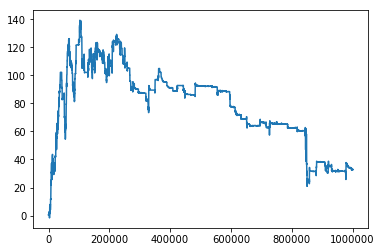

In [17]:
plt.plot(pos)